/var/folders/6p/w637w51x6qs879krdfn723gh0000gn/T/ipykernel_46677/3827301907.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2024-01-01", end="2024-05-31")
[*********************100%***********************]  1 of 1 completed


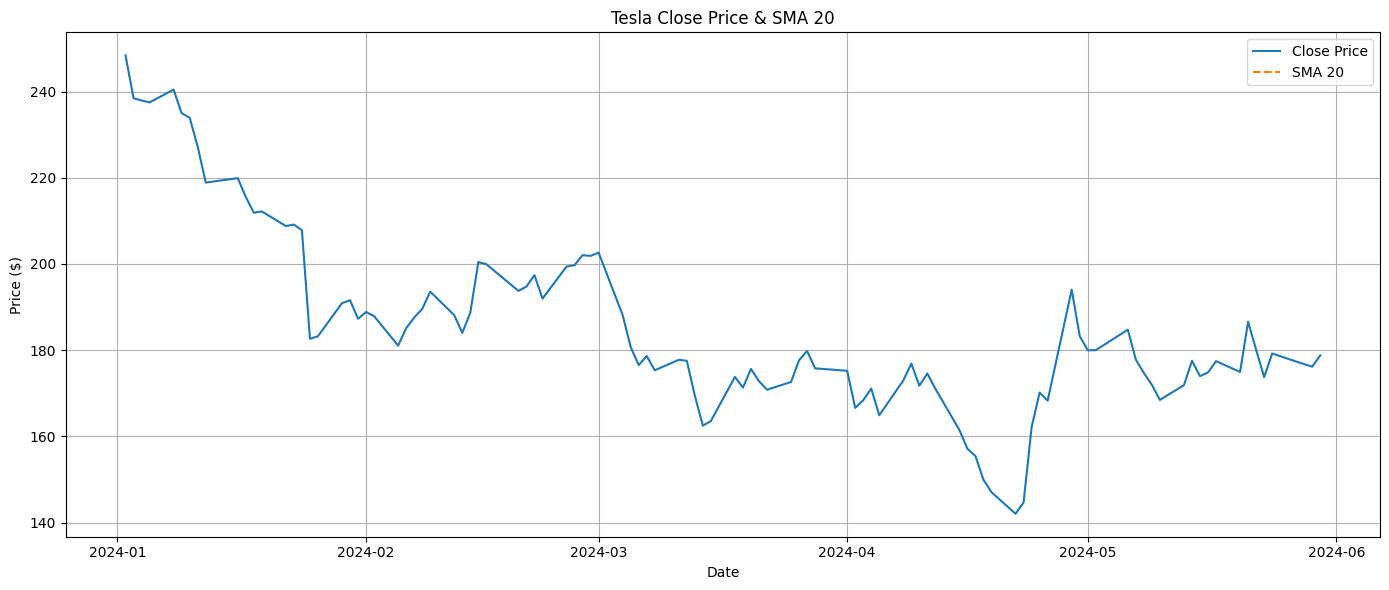

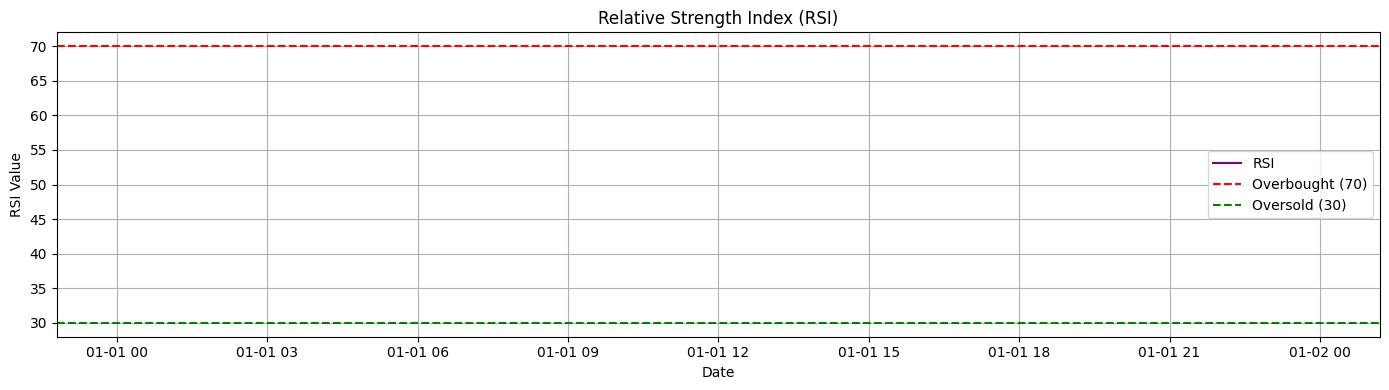

In [1]:
# notebooks/03_technical_indicators.ipynb

import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
import pandas as pd  # ✅ Required for concat — missing in your original code


# Load stock price data
df = yf.download("TSLA", start="2024-01-01", end="2024-05-31")
df.reset_index(inplace=True)

# Add indicators
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['RSI'] = ta.rsi(df['Close'], length=14)

# MACD returns a DataFrame with columns: MACD_12_26_9, MACDh_12_26_9, MACDs_12_26_9
macd = ta.macd(df['Close'])
df = pd.concat([df, macd], axis=1)

# Plot SMA
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--')
plt.title('Tesla Close Price & SMA 20')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
